In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import cross_val_score

In [16]:
data = pd.read_csv('P:/python/glass.csv')
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [17]:
data[data.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [18]:
data[data.RI==1.52213]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [19]:
data = data.drop(labels = 39, axis = 0).reset_index(drop = True)

In [21]:
data1 = data.copy()

In [23]:
data1.Type.value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [24]:
x = data1.iloc[:,:9]
y = data1.iloc[:,9]
print(x.head())
y.head()

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0


0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

In [25]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.25,random_state = 40)
print(x_train.shape, x_test.shape,y_train.shape,y_test.shape)

(159, 9) (54, 9) (159,) (54,)


### K-Nearest Neighbors algorithm

In [26]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors = n_neighbors)

In [27]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model, param_grid = param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [28]:
print(grid.best_params_)
print('model accuarcy is', grid.best_score_)

{'n_neighbors': 1}
model accuarcy is 0.7862903225806452


In [35]:
acc = []
for i in range(1,40):
    model1 = KNeighborsClassifier(n_neighbors = i)
    model1.fit(x_train, y_train)
    accuracy = np.mean(cross_val_score(model1, x_train, y_train, cv=5))
    acc.append(accuracy)

In [36]:
print(acc)

[0.7862903225806452, 0.7046370967741936, 0.6858870967741936, 0.6544354838709678, 0.6481854838709677, 0.6542338709677419, 0.6477822580645161, 0.6606854838709678, 0.6481854838709677, 0.6604838709677419, 0.6540322580645161, 0.6606854838709678, 0.6479838709677419, 0.6606854838709678, 0.6606854838709678, 0.6544354838709678, 0.635483870967742, 0.6163306451612903, 0.6102822580645161, 0.6038306451612903, 0.6102822580645161, 0.6100806451612903, 0.6036290322580645, 0.5844758064516129, 0.5844758064516129, 0.5782258064516129, 0.5969758064516129, 0.5784274193548387, 0.5782258064516129, 0.5721774193548387, 0.5721774193548387, 0.5594758064516129, 0.5786290322580645, 0.5467741935483871, 0.5534274193548387, 0.5532258064516129, 0.5659274193548387, 0.5657258064516129, 0.5721774193548387]


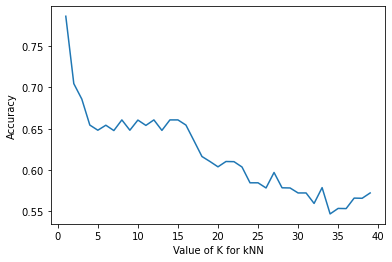

In [37]:
plt.plot(range(1,40), acc)
plt.xlabel('Value of K for kNN')
plt.ylabel('Accuracy')
plt.show()

Now i have loaded the dataset i have check for the null values and any duplicated values and there is one duplicate value and i have droped that duplicate row which is 39. Now i have divided the data into output and input and named as x and y, i have taken type column as output remaining as input. Here i have doing glass into categorie based on type. And by using train test split method i have divided the data into xtrain ytrain xtest and ytest. now by using k nearest neighbor i have build a model. In that model by using grid search i have given neighbor values in the range of 1 to 40. Then by using grid search neighbor value is 1 and i have got best accuracy 78%. Then i have done plot between k values and accuracy.